In [1]:
import math

In [2]:
# low = lower range for variables, high = higher range for variables
def genesis(size,var, high , low):
   pop_size = (size,var)
   new_pop = np.random.uniform(low=low,high=high,size=pop_size)
   return new_pop

In [3]:
def fitness(p):
# Evaluating fitness Interference function "double fit (doublep[])".
   fitness=np.zeros((len(p),1))
   for i in range(len(p)):
       x,y,z = p[i][0] , p[i][1] , p[i][2]
        # Define your fitness function here
       fitness[i,0] = 2*math.exp(-x)*x*z - 2*y**3 + y**2 - 3*z**3
   return fitness

In [4]:
def selection(pop, fitness, num_parents):
   parents = np.empty((num_parents, pop.shape[1]))
   for parent_num in range(num_parents):
      max_fitness_idx = np.where(fitness == np.max(fitness))
      max_fitness_idx = max_fitness_idx[0][0]
      parents[parent_num, :] = pop[max_fitness_idx, :]
      fitness[max_fitness_idx] = -99999999999
   return parents

In [5]:
def crossover(parents, offspring_size):
   offspring = np.empty(offspring_size)
   crossover_point = np.uint8(offspring_size[1]/2)
   for k in range(offspring_size[0]):
      parent1_idx = k%parents.shape[0]
      parent2_idx = (k+1)%parents.shape[0]
      offspring[k, 0:crossover_point] = parents[parent1_idx,     0:crossover_point]
      offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
   return offspring

In [6]:
def mutation(offspring_crossover):
   for idx in range(offspring_crossover.shape[0]):
      random_value = np.random.uniform(0, 10, 1)
# 10 percent change maximum keeping 90 percent mutation rate 
      i= randint(0, 2)
      offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value 
   return offspring_crossover

In [7]:
import numpy as np
from random import randint

num_var = 3
sizeof_pop= 100
upper_limit = 10000
lower_limit = 0
num_parents = 2

population = genesis(sizeof_pop , num_var, upper_limit ,lower_limit)
print(population)
Scores=[]
num_generations = 20
for generation in range(num_generations):
   print("\n\nGeneration : ", generation)
   fitness_score = fitness(population)
   parents = selection(population, fitness_score, num_parents)
   print("Best Parents \n",parents)
   offspring_crossover = crossover(parents, offspring_size=(2*num_parents, num_var))
   offspring_mutation = mutation(offspring_crossover)
   print("Mutated OffSprings\n",offspring_mutation)
   population[0:parents.shape[0], :] = parents
   population[parents.shape[0]:6, :] = offspring_mutation
   Scores.append(np.max(fitness_score))
   print("Best result : ", np.max(fitness_score))

[[8108.86030182 4530.30793364 2803.72846451]
 [3141.79099099 7425.92088004 9792.82623973]
 [6212.03711644 1871.02248264 2565.73310072]
 [9087.75762639 5481.75957836 1932.11358734]
 [ 858.18075723 7507.273608    896.73072928]
 [2601.16869718 6579.12909936 5691.25307861]
 [ 963.70838289 1780.77762821 8451.70392319]
 [3697.34958528 8667.42116124 1429.20733485]
 [8861.80345339 7989.43172501 2574.24893616]
 [2959.04057161   56.15669609 7495.00932771]
 [6304.71982497 1675.53604812 6446.43472872]
 [2470.82277783 7165.65616849 5677.80328501]
 [5853.90859923 2236.49415691 1184.4034341 ]
 [2764.23235601 1192.99777598 2627.29980329]
 [7441.0942028  3920.30052308 9218.18160837]
 [8871.08128055 6885.21884019 7317.83590479]
 [ 171.25197535 2556.05639486 1866.9771869 ]
 [6097.19394675 5401.20712077 4227.36600763]
 [ 249.70066604 5630.10632311 6157.43880695]
 [5276.1591751  4241.19211135 1383.61106862]
 [ 667.17699392 8863.82389533 3033.85420366]
 [5562.41923889  745.45283117 3244.16071173]
 [7655.192

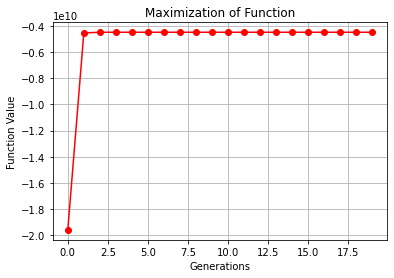

In [8]:
import matplotlib.pyplot as plt
Evaluations = Scores
plt.plot(Evaluations,'o-',color='red')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()